In [1]:
import numpy as np
import gensim
import tensorflow as tf

['text', 'spam']
5728
5728
5728
["Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three busines

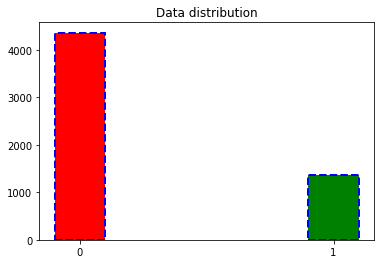

Punctuation: :
Punctuation: ;
Punctuation: ,
Punctuation: .
Punctuation: -
Punctuation: '
Punctuation: %
Punctuation: _
Punctuation: $
Punctuation: !
Punctuation: (
Punctuation: )
Punctuation: @
Punctuation: &
Punctuation: /
Punctuation: ?
Punctuation: |
Punctuation: *
Punctuation: "
Punctuation: +
Punctuation: =
Punctuation: >
Punctuation: #
Punctuation: [
Punctuation: ]
Punctuation: ^
Punctuation: }
Punctuation: <
Punctuation: ~
Punctuation: \
Punctuation: `
Punctuation: {
32
[':', ';', ',', '.', '-', "'", '%', '_', '$', '!', '(', ')', '@', '&', '/', '?', '|', '*', '"', '+', '=', '>', '#', '[', ']', '^', '}', '<', '~', '\\', '`', '{']
[('', 475161), ('the', 50110), ('to', 41734), ('and', 27478), ('of', 23757), ('a', 19943), ('you', 19149), ('in', 17972), ('i', 17421), ('for', 16696)]


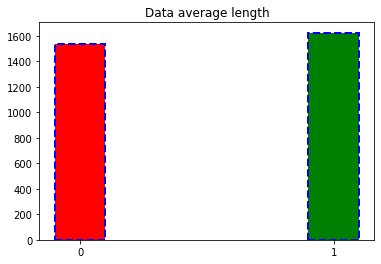

5728
Punctuation: :
Punctuation: ;
Punctuation: ,
Punctuation: .
Punctuation: -
Punctuation: '
Punctuation: %
Punctuation: _
Punctuation: $
Punctuation: !
Punctuation: (
Punctuation: )
Punctuation: @
Punctuation: &
Punctuation: /
Punctuation: ?
Punctuation: |
Punctuation: *
Punctuation: "
Punctuation: +
Punctuation: =
Punctuation: >
Punctuation: #
Punctuation: [
Punctuation: ]
Punctuation: ^
Punctuation: }
Punctuation: <
Punctuation: ~
Punctuation: \
Punctuation: `
Punctuation: {
[':', ';', ',', '.', '-', "'", '%', '_', '$', '!', '(', ')', '@', '&', '/', '?', '|', '*', '"', '+', '=', '>', '#', '[', ']', '^', '}', '<', '~', '\\', '`', '{']


In [2]:
from ipynb.fs.full.preprocessing import processRef
from ipynb.fs.full.data_analysis import readData, flatten_input, detect_punctuations

In [3]:
X, _ = readData("./data/Spam_Emails.csv")
concatenate_string, X_copy = flatten_input(X)
new_refs = processRef(X_copy) 

5728


In [4]:
y = np.load("./data/classes.npy")

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_refs, y, test_size=0.2, random_state=42)


In [6]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

4582
4582
1146
1146


In [7]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [8]:
sequences = tokenizer.texts_to_sequences(X_train)

In [9]:
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, 
                       truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [10]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy', f1_metric])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           16000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 6)                 9606      
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 20
history=model.fit(padded, y_train, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/20
144/144 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8313 - f1_metric: 0.3604 - val_loss: 0.1722 - val_accuracy: 0.9503 - val_f1_metric: 0.9015
Epoch 2/20
144/144 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9727 - f1_metric: 0.9307 - val_loss: 0.0782 - val_accuracy: 0.9712 - val_f1_metric: 0.9363
Epoch 3/20
144/144 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9891 - f1_metric: 0.9783 - val_loss: 0.0594 - val_accuracy: 0.9799 - val_f1_metric: 0.9560
Epoch 4/20
144/144 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9959 - f1_metric: 0.9910 - val_loss: 0.0528 - val_accuracy: 0.9834 - val_f1_metric: 0.9618
Epoch 5/20
144/144 [==============================] - 0s 2ms/step - loss: 0.0136 - accuracy: 0.9976 - f1_metric: 0.9939 - val_loss: 0.0555 - val_accuracy: 0.9808 - val_f1_metric: 0.9563
Epoch 6/20
144/144 [==============================] - 0s 2ms/step - lo

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
padded = np.array(padded)
y_train = np.array(y_train)
y_test = np.array(y_test)
testing_padded = np.array(testing_padded)
y_pred = gnb.fit(padded, y_train).predict(testing_padded)
print("Number of mislabeled points out of a total %d points : %d"% (testing_padded.shape[0], (y_test != y_pred).sum()))


Number of mislabeled points out of a total 1146 points : 407


In [14]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')

0.5906521435774297